<img src="spotify-premium-akcio-001-1024x576.webp" alt="Drawing" style="width: 500px;"/>

Top Hits Spotify from 2000-2019

- Fonte: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019?resource=download

Relação de Campos:

- **artist:** Nome do Artista
- **song:** Nome da Faixa
- **duration_ms:** Duração da trilha em milissegundos
- **explicit:** se a letra da música possui um mais critérios que podem ser considerados ofensivos ou inadequados para crianças
- **year:** Ano de lançamento da faixa
- **popularity:** quanto maior o valor, mais popular é a música
- **danceability:** Dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0 é o menos dançável e 1 é o mais dançável
- **energy:** A energia é uma medida de 0 a 1 e representa uma medida perceptiva de intensidade e atividade
- **key:** A tonalidade em que a faixa está. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1
- **Loudness:** O volume geral de uma faixa em decibéis (dB). Os valores geralmente variam entre -60 e 0 db
- **mode:** Mode indica a modalidade (maior ou menor) de uma faixa, maior é representado por 1 e menor é 0
- **Speechiness:** Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1 o valor do atributo
    - Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. 
    - Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. 
    - Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala
- **acousticness:** Uma medida de confiança de 0 a 1 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
- **instrumentalness:** prevê se uma faixa não contém vocais. Quanto mais próximo o valor de instrumentalidade estiver de 1, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1
- **liveness:** Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa
- **valence:** Uma medida de 0 a 1 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada)
- **tempo:** o andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida
- **gênero:** Gênero da faixa

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import missingno as msno

Importando o arquivo

In [24]:
df_spotify = pd.read_csv('songs_normalize.csv')

Verificando os campos presentes na tabela

In [25]:
df_spotify.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [26]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [7]:
#Verificando nulos
df_spotify.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

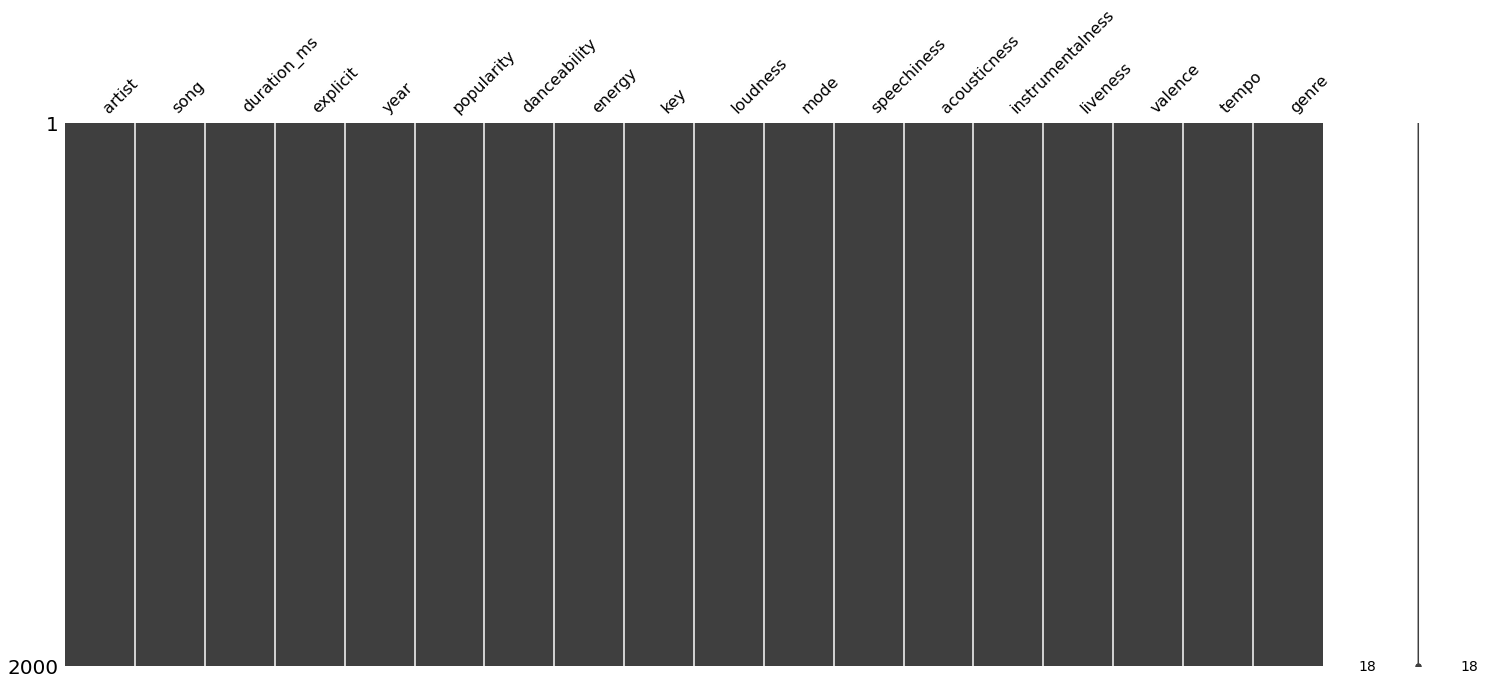

In [33]:
#Verificando nulos
msno.matrix(df_spotify)
plt.show()

Imprimindo as estatísticas padrões do dataframe

In [27]:
df_spotify.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [28]:
#estilizando matriz com função do Pandas
df_spotify.describe().style.background_gradient(cmap = 'rocket_r')

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.494000,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.859960,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.000000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.000000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.000000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Verificando a presença de outliers nas variáveis numéricas

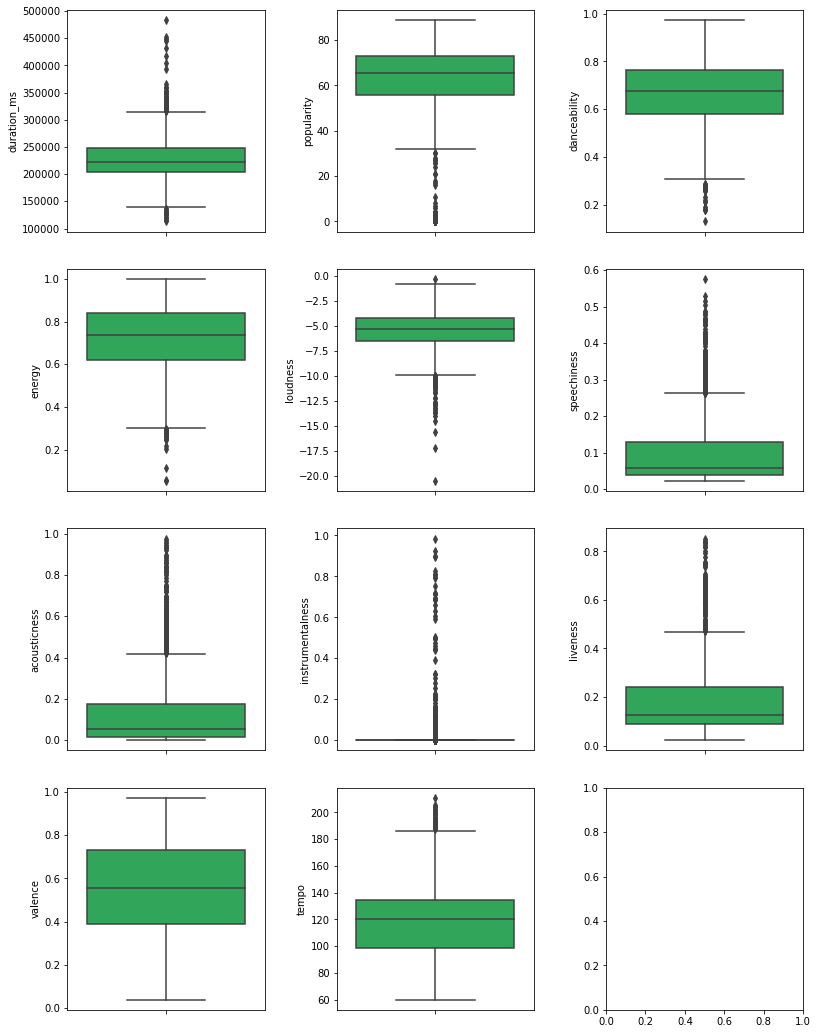

In [58]:
#Outliers por variável
fig, ax = plt.subplots(4, 3, figsize=(12,15))
sns.boxplot(data=df_spotify, y='duration_ms', ax=ax[0,0], color='#1db954')
sns.boxplot(data=df_spotify, y='popularity', ax=ax[0,1], color='#1db954')
sns.boxplot(data=df_spotify, y='danceability' , ax=ax[0,2], color='#1db954')
sns.boxplot(data=df_spotify, y='energy', ax=ax[1,0], color='#1db954')
sns.boxplot(data=df_spotify, y='loudness', ax=ax[1,1], color='#1db954')
sns.boxplot(data=df_spotify, y='speechiness', ax=ax[1,2], color='#1db954')
sns.boxplot(data=df_spotify, y='acousticness', ax=ax[2,0], color='#1db954')
sns.boxplot(data=df_spotify, y='instrumentalness', ax=ax[2,1], color='#1db954')
sns.boxplot(data=df_spotify, y='liveness', ax=ax[2,2], color='#1db954')
sns.boxplot(data=df_spotify, y='valence', ax=ax[3,0], color='#1db954')
sns.boxplot(data=df_spotify, y='tempo', ax=ax[3,1], color='#1db954')
#sns.boxplot(data=df_spotify, y='mode', ax=ax[3,2])

fig.tight_layout(pad=3)  # distância entre cada gráfico

In [9]:
#foco na variável "instrumentalness", para entender melhor os valores
px.histogram(data_frame=df_spotify, x="instrumentalness", marginal="box")

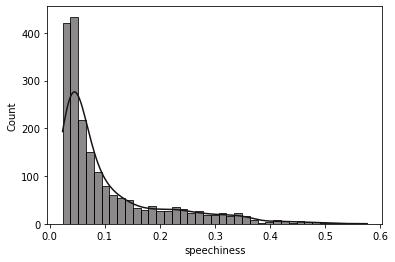

In [10]:
#foco na variável "speechiness", para entender melhor os valores
sns.histplot(data=df_spotify, x='speechiness', kde=True, color="#191414");

**- Speechiness:** Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1 o valor do atributo

    - Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. 
    - Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. 
    - Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala

Quantas músicas são lançadas por ano?

Text(0.5, 1.0, 'Média de músicas lançadas por ano')

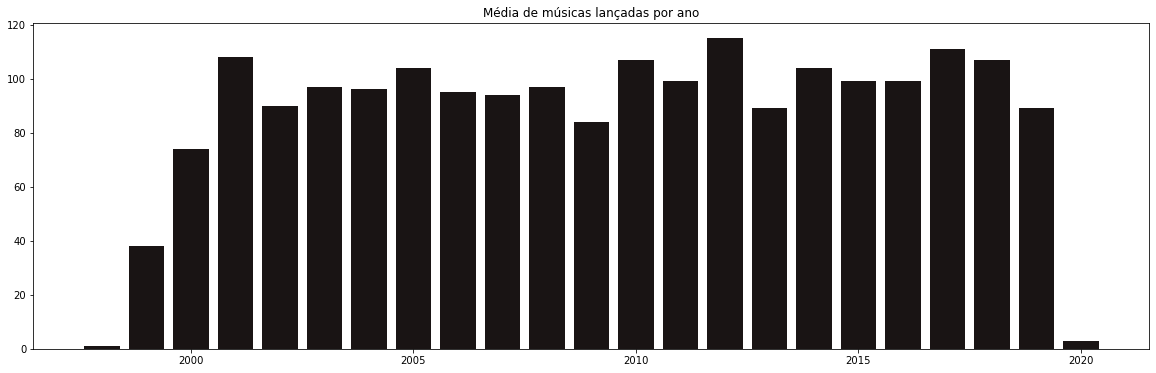

In [11]:
#usando Matplotlib
plt.figure(figsize=(20,6))
df_qtd_ano = pd.pivot_table(data= df_spotify, index='year', values='song', aggfunc='count')
plt.bar(df_qtd_ano.index, df_qtd_ano['song'], color='#191414')
plt.title('Média de músicas lançadas por ano')

Como as variáveis danceability, energy, acousticness, valence se comportam ao longo dos anos?

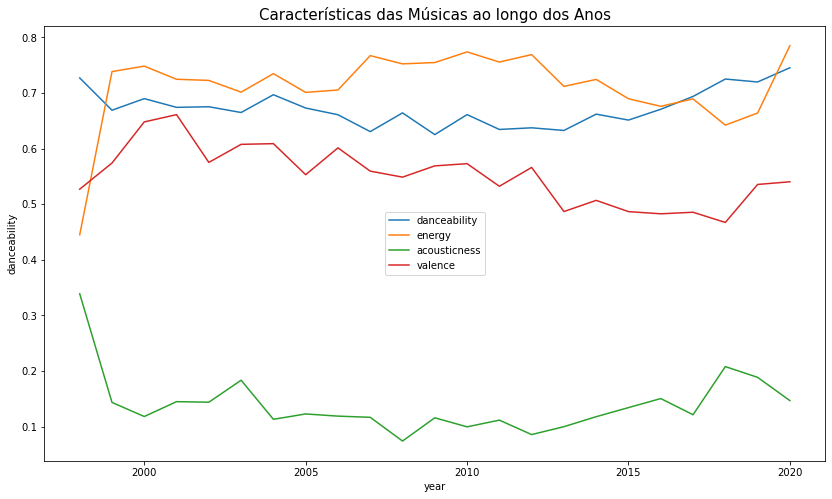

In [32]:
year_mean = df_spotify[['danceability','energy','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
plt.figure(figsize=(14,8))
plt.title("Características das Músicas ao longo dos Anos", fontsize=15)
linhas = ['danceability','energy','acousticness','valence']

for linha in linhas:
    ax = sns.lineplot(x='year', y=linha, data=year_mean)
    
plt.legend(linhas)

Qual gênero possui maior quantidade de músicas?

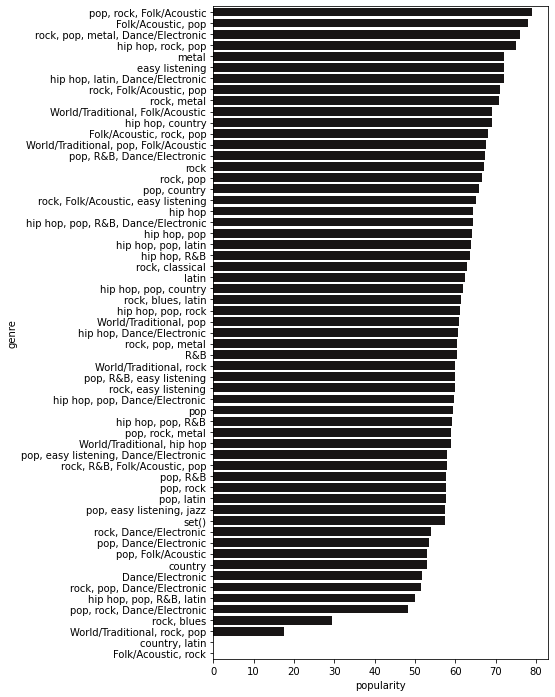

In [47]:
plt.figure(figsize = (6,12))
popularity_genre = df_spotify.groupby('genre').mean().sort_values('popularity', ascending=False)
sns.barplot(data = popularity_genre,y =popularity_genre.index, x = 'popularity', orient='h', color="#191414")
plt.show()

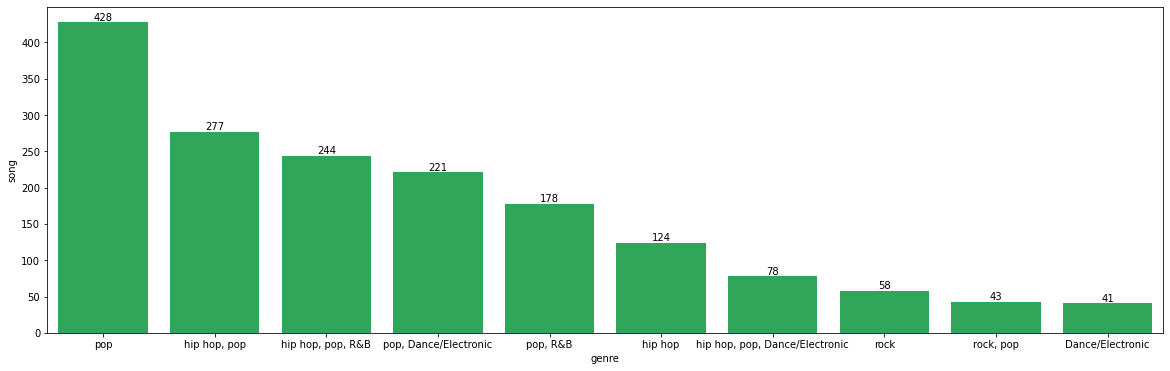

In [12]:
qtd_genero = df_spotify.pivot_table(index='genre', values='song', aggfunc='count').sort_values(by=['song'], ascending=False).head(10)
qtd_genero.reset_index(inplace=True)

plt.figure(figsize=(20,6))
ax=sns.barplot(data=qtd_genero, x='genre', y='song', color="#1db954")
ax.bar_label(ax.containers[0]);

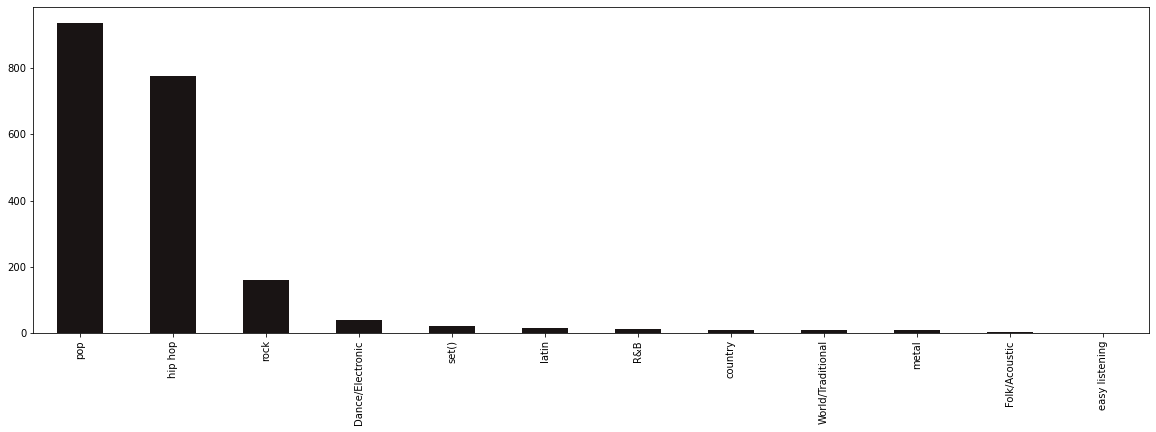

In [13]:
#delimitando o gênero da música:
df_genero = df_spotify['genre'].str.split(',', expand=True).copy()
plt.figure(figsize=(20,6))
df_genero[0].value_counts().plot(kind='bar', color="#191414");

Qual artista possui maior quantidade de músicas?

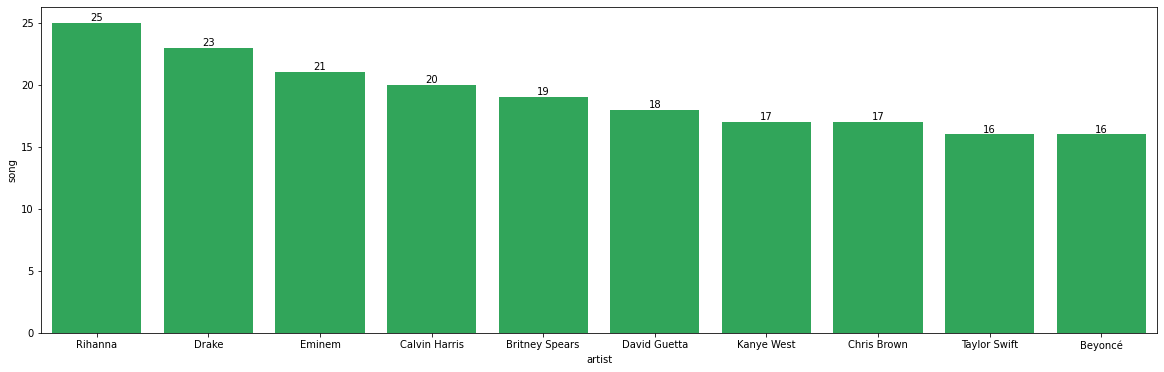

In [14]:
#Top 15 artistas com maior qtd de músicas
#Usando Pandas

qtd_artistas = df_spotify.pivot_table(index='artist', values='song', aggfunc='count').sort_values(by=['song'], ascending=False).head(10)
qtd_artistas.reset_index(inplace=True)

plt.figure(figsize=(20,6))
ax=sns.barplot(data=qtd_artistas, x='artist', y='song', color="#1db954") 
#,palette="viridis"
ax.bar_label(ax.containers[0]);

Qual a duração média das músicas?

Text(0.5, 1.0, 'Média de duração das músicas ao longo dos anos')

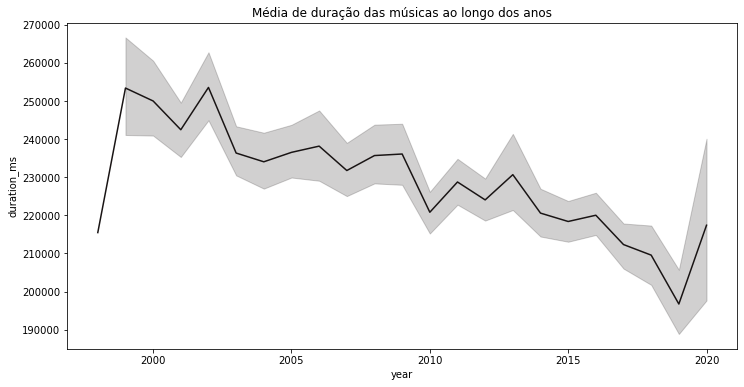

In [15]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_spotify, x='year', y='duration_ms', color="#191414");
ax.set_title('Média de duração das músicas ao longo dos anos')

Qual o % de músicas explícitas?

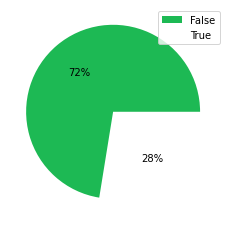

In [16]:
df_explicit = df_spotify.pivot_table(index='explicit', values='song', aggfunc='count');
df_explicit

colors = ['#1db954','#ffffff']
explode = (0.05,0.05)

plt.pie('song', data=df_explicit, autopct='%1.0f%%', colors=colors, explode=explode)

plt.legend(df_explicit.index);

Existe uma relação entre a quantidade de músicas lançadas e a popularidade do artista?

In [38]:
#Criamos um subconjunto do df_spotify com os 20 artistas mais frequentes
freq_artists = df_spotify.artist.value_counts().nlargest(20)
freq_artists_d = df_spotify[df_spotify.artist.isin(list(freq_artists.index))]

art_nsongs_pop = pd.DataFrame({'n_songs':freq_artists, 'popularity':freq_artists_d.groupby('artist').mean().popularity})

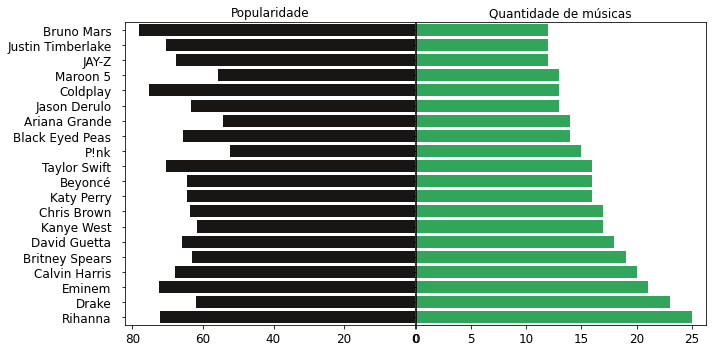

In [41]:
art_nsongs_pop = art_nsongs_pop.sort_values('n_songs')

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='popularity', color='#191414', orient='h', ax = axes[0])
axes[0].set_title('Popularidade',fontsize = 12)
axes[0].tick_params(axis='y', pad=10,labelsize =12)
axes[0].tick_params(axis='x',labelsize =12)
axes[0].set_xlabel('')
axes[0].invert_xaxis()

sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='n_songs', color='#1db954', orient='h', ax = axes[1])
axes[1].set_title('Quantidade de músicas',fontsize = 12)
axes[1].tick_params(axis='y', pad=10,labelsize =12)
axes[1].tick_params(axis='x',labelsize =12)
axes[1].set_xlabel('')
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.003)

Qual o intervalo de lançamento para os artistas com maior quantidade de músicas?

In [42]:
artist_list = df_spotify.artist.value_counts().index[:5]
df_spotify.artist.value_counts()[:5]
df_artist = df_spotify[df_spotify.artist.isin(artist_list)][['artist','year','energy']].groupby(['artist','year']).count().reset_index()
df_artist.rename(columns={'energy':'song_count'}, inplace=True)
df_artist.head()

,artist,year,song_count
0,Britney Spears,1999,1
1,Britney Spears,2000,2
2,Britney Spears,2001,3
3,Britney Spears,2003,3
4,Britney Spears,2004,1


<AxesSubplot:xlabel='year', ylabel='song_count'>

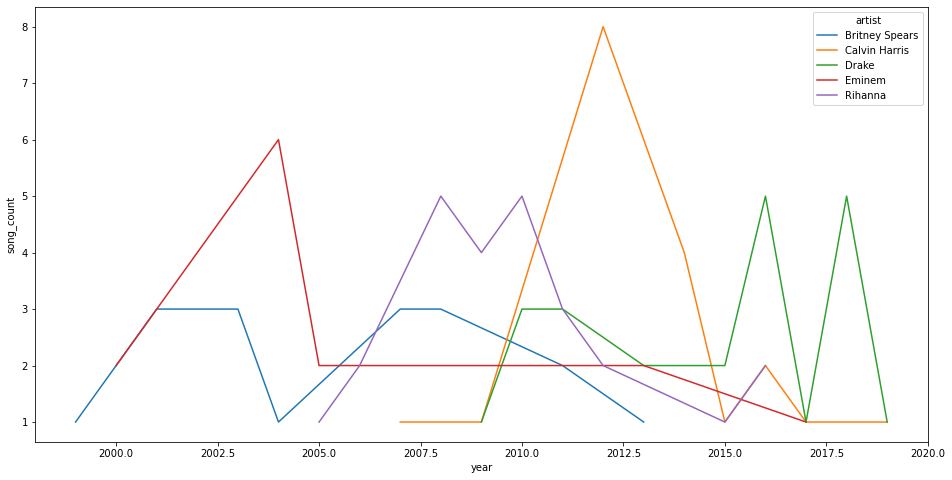

In [43]:
plt.figure(figsize=(16,8))
sns.lineplot(x='year', y='song_count', hue='artist', data=df_artist)

Análise de relação entre todas as variáveis

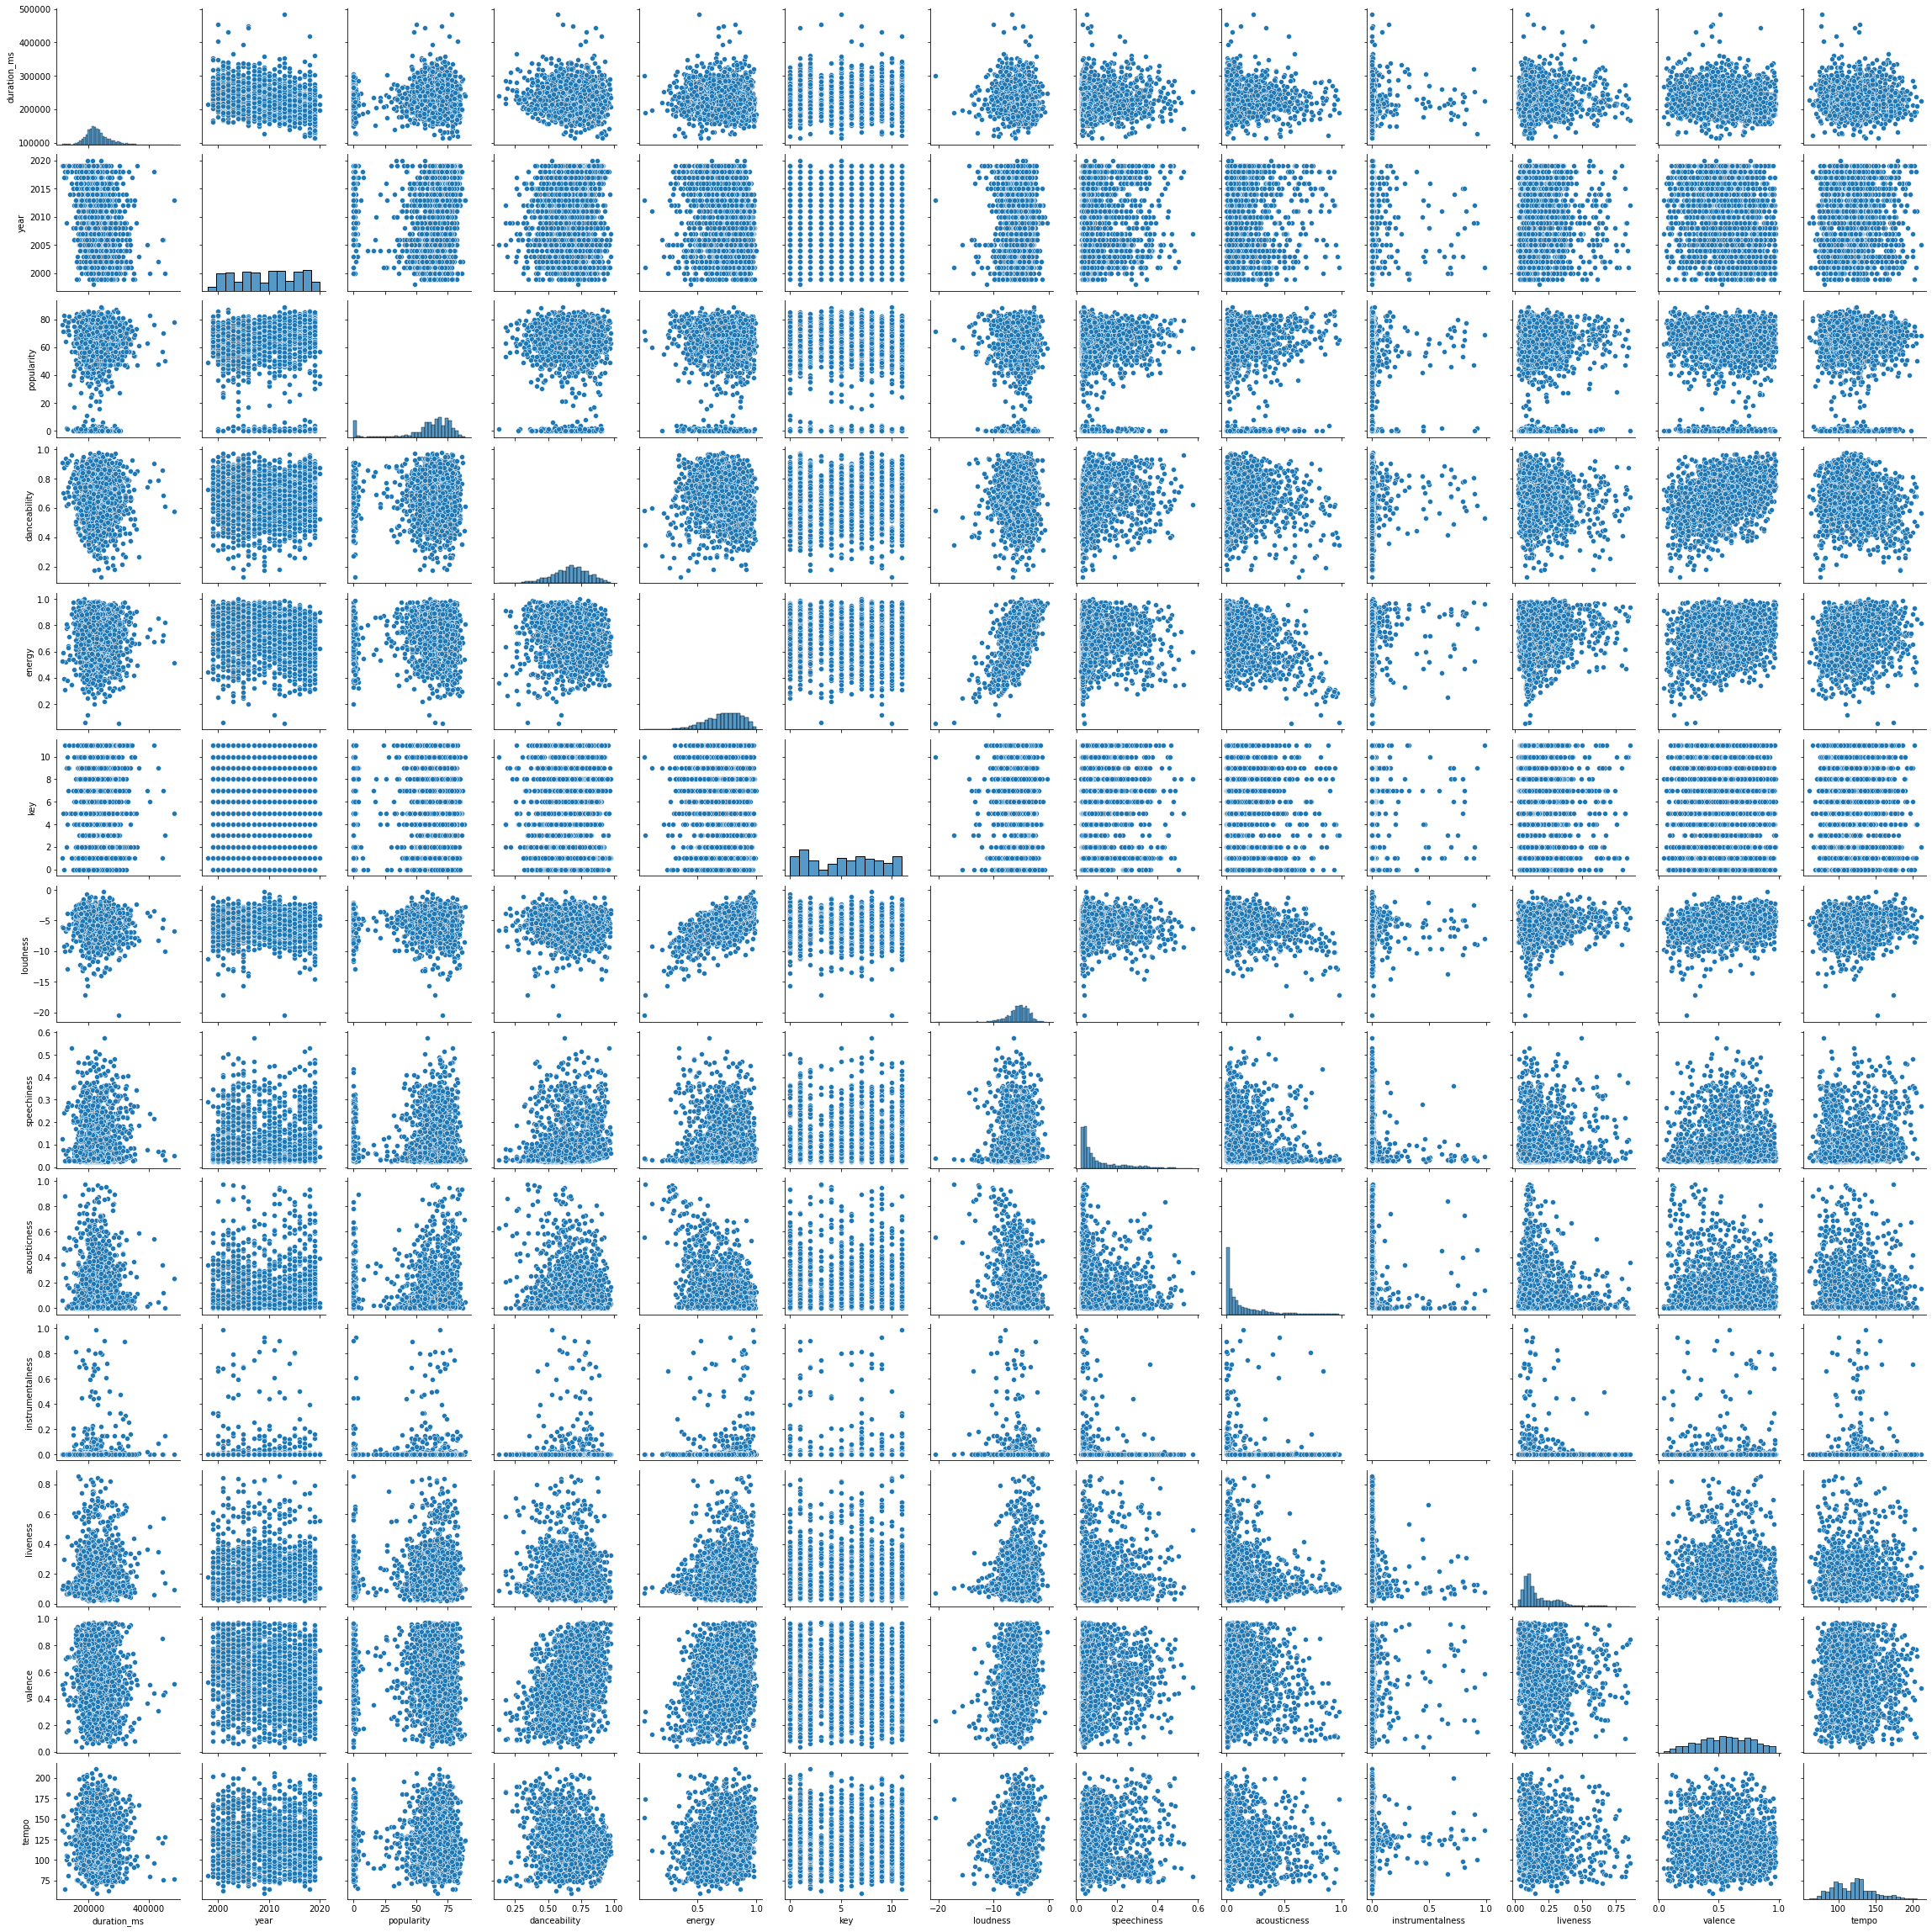

In [44]:
sns.pairplot(data=df_spotify.drop(["explicit", "mode"], axis =1));

Entendendo melhor a relação entre Energia e Volume. O gênero influencia nessa relação?


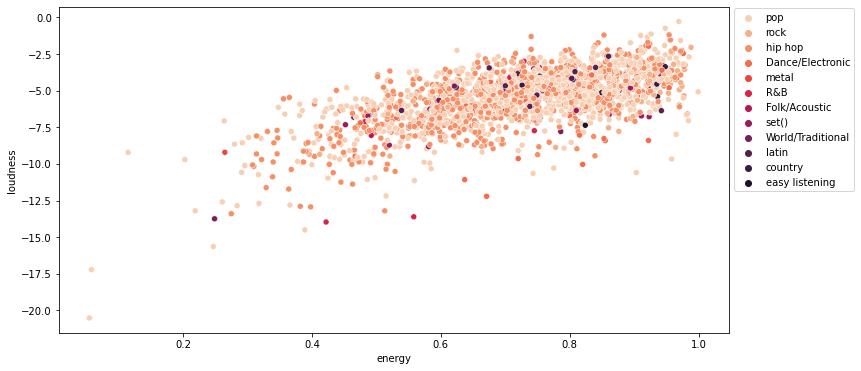

In [ ]:
df_spotify['new_column'] = df_spotify['genre'].str.split(',', expand=True)[0]
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_spotify, x='energy', y='loudness', hue='new_column', palette='rocket_r')
plt.legend(bbox_to_anchor=(1,1.01));